In [44]:
#import the standard libraries for data
import pandas as pd,numpy as np,seaborn as sns,matplotlib.pyplot as plt, plotly.express as px
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.preprocessing import LabelEncoder,MinMaxScaler,StandardScaler,OneHotEncoder
import warnings
warnings.filterwarnings('ignore')

In [45]:
#Load the train dataset
train=pd.read_csv('/content/train.csv')
train.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10.0,A,2,0.0,3.0,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10.0,A,2,0.0,1.0,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10.0,A,2,0.0,12.0,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10.0,A,2,0.0,12.0,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16.0,C,4+,0.0,8.0,NaN,NaN,7969.0


In [46]:
#load the test dataset
test=pd.read_csv('/content/test.csv')
test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [47]:
#train datainofrmation
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429156 entries, 0 to 429155
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     429156 non-null  int64  
 1   Product_ID                  429156 non-null  object 
 2   Gender                      429155 non-null  object 
 3   Age                         429155 non-null  object 
 4   Occupation                  429155 non-null  float64
 5   City_Category               429155 non-null  object 
 6   Stay_In_Current_City_Years  429155 non-null  object 
 7   Marital_Status              429155 non-null  float64
 8   Product_Category_1          429155 non-null  float64
 9   Product_Category_2          295891 non-null  float64
 10  Product_Category_3          131351 non-null  float64
 11  Purchase                    429155 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 39.3+ MB


In [48]:
#test data information
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


In [49]:
#check the test and train dataset lenght
print("The test dataset",len(test))
print("The train dataset",len(train))

The test dataset 233599
The train dataset 429156


In [50]:
#Check the statstic of the train dataset
train.describe().style.background_gradient(cmap='rainbow')

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,429156.000000,429155.000000,429155.000000,429155.000000,295891.000000,131351.000000,429155.000000
mean,1003025.829339,8.077629,0.409936,5.297450,9.844520,12.658556,9329.595629
std,1728.255680,6.524068,0.491822,3.749678,5.088111,4.126073,4978.893423
min,1000001.000000,0.000000,0.000000,1.000000,2.000000,3.000000,185.000000
25%,1001510.000000,2.000000,0.000000,1.000000,5.000000,9.000000,5866.000000
50%,1003072.000000,7.000000,0.000000,5.000000,9.000000,14.000000,8061.000000
75%,1004476.000000,14.000000,1.000000,8.000000,15.000000,16.000000,12070.500000
max,1006040.000000,20.000000,1.000000,18.000000,18.000000,18.000000,23961.000000


In [51]:
#Check the statsic of the test dataset
test.describe().style.background_gradient(cmap='ocean_r')

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,233599.000000,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1003029.356859,8.085407,0.410070,5.276542,9.849586,12.669454
std,1726.504968,6.521146,0.491847,3.736380,5.094943,4.125944
min,1000001.000000,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1001527.000000,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1003070.000000,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1004477.000000,14.000000,1.000000,8.000000,15.000000,16.000000
max,1006040.000000,20.000000,1.000000,18.000000,18.000000,18.000000


# Correlation matrix

In [52]:
#the traindataset the correlation
train_corr=train.corr().style.set_properties(**{'background-color': 'yellow','color':'red','border-color': 'blue'})
train_corr

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
User_ID,1.000000,-0.023231,0.020468,0.002707,0.000253,0.002109,0.006257
Occupation,-0.023231,1.000000,0.024092,-0.008111,-0.002004,0.012768,0.021185
Marital_Status,0.020468,0.024092,1.000000,0.020103,0.015189,0.017244,0.000632
Product_Category_1,0.002707,-0.008111,0.020103,1.000000,0.540611,0.230723,-0.313769
Product_Category_2,0.000253,-0.002004,0.015189,0.540611,1.000000,0.544708,-0.208718
Product_Category_3,0.002109,0.012768,0.017244,0.230723,0.544708,1.000000,-0.022608
Purchase,0.006257,0.021185,0.000632,-0.313769,-0.208718,-0.022608,1.000000


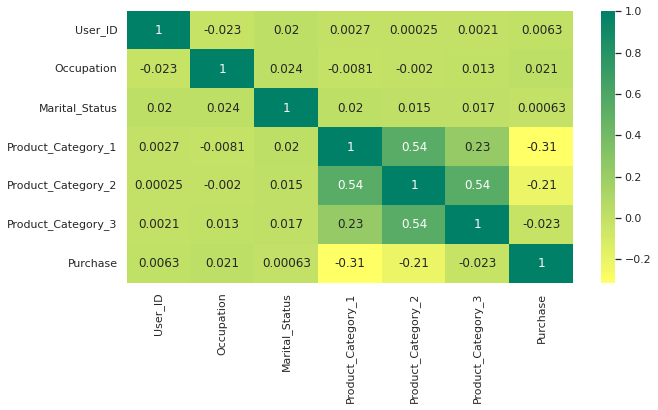

In [53]:
#To visualize the correlation using the seaborn
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(train.corr(),annot=True,cmap='summer_r')

In [54]:
#the traindataset the correlation
test_corr=test.corr().style.set_properties(**{'background-color': 'pink','color':'blue','border-color': 'red'})
test_corr

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
User_ID,1.000000,-0.023988,0.019883,0.006428,0.004065,0.000316
Occupation,-0.023988,1.000000,0.021872,-0.010465,-0.001685,0.003838
Marital_Status,0.019883,0.021872,1.000000,0.018860,0.021766,0.016119
Product_Category_1,0.006428,-0.010465,0.018860,1.000000,0.540063,0.225054
Product_Category_2,0.004065,-0.001685,0.021766,0.540063,1.000000,0.543417
Product_Category_3,0.000316,0.003838,0.016119,0.225054,0.543417,1.000000


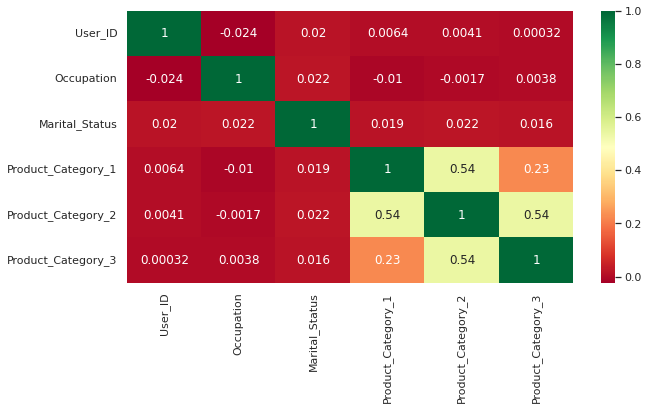

In [55]:
#To visualize the correlation using the seaborn
sns.set(rc={'figure.figsize':(10,5)})
sns.heatmap(test.corr(),annot=True,cmap='RdYlGn')

# Checking the null values in the train and test dataset

In [56]:
#Null vlaues in the train dataset
train.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             1
Age                                1
Occupation                         1
City_Category                      1
Stay_In_Current_City_Years         1
Marital_Status                     1
Product_Category_1                 1
Product_Category_2            133265
Product_Category_3            297805
Purchase                           1
dtype: int64

In [57]:
#fill the null values with the mean values in the train dataset
train['Product_Category_2']=train['Product_Category_2'].fillna(train['Product_Category_2'].mean())
train['Product_Category_3']=train['Product_Category_3'].fillna(train['Product_Category_3'].mean())

In [58]:
#Let's check it any null values in the train dataset
test.isna().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2             72344
Product_Category_3            162562
dtype: int64

In [59]:
#fill the null values with the mean values in the test dataset
test['Product_Category_2']=test['Product_Category_2'].fillna(test['Product_Category_2'].mean())
test['Product_Category_3']=test['Product_Category_3'].fillna(test['Product_Category_3'].mean())

# Exploratory Data Analysis(EDA)

## Exploratory Data Analysis (EDA) is an approach to analyze the data using visual techniques. It is used to discover trends, patterns, or to check assumptions with the help of statistical summary and graphical representations.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd3de5c3590>,
      dtype=object)

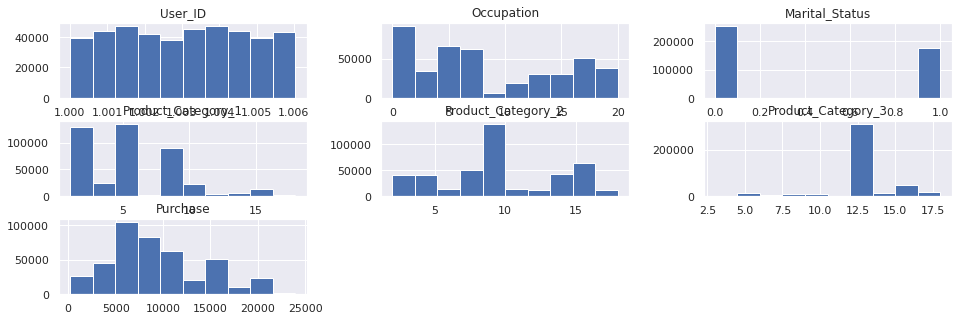

In [60]:
# Histogram using pandas 
train.hist(figsize=(16,5))

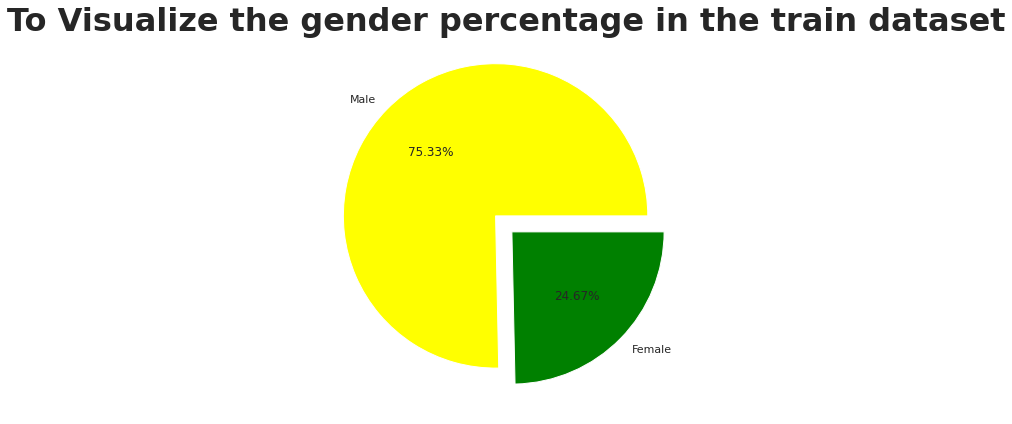

In [61]:
#Let's visualize the Gender percentage in the train dataset
gender=train['Gender'].value_counts()
#to visualize the gender percentage in pie chart
plt.figure(figsize=(18,7))
plt.pie(gender,colors=['yellow','green'],labels=['Male','Female'],autopct='%1.2f%%',explode=[0.1,0.05])
plt.title("To Visualize the gender percentage in the train dataset",fontsize=32,fontweight='bold')
plt.show()

# Observation:
#### 1.From the above data the male percentage is high compare to the Female percentage.

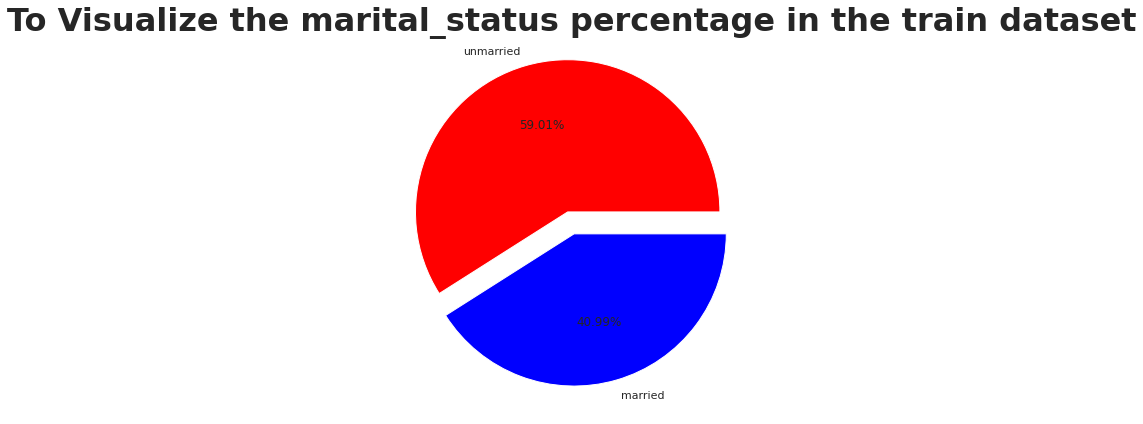

In [62]:
#Let's visualize the Gender percentage in the train dataset
marital_status=train['Marital_Status'].value_counts()
#to visualize the gender percentage in pie chart
plt.figure(figsize=(18,7))
plt.pie(marital_status,colors=['red','blue'],labels=['unmarried','married'],autopct='%1.2f%%',explode=[0.1,0.05])
plt.title("To Visualize the marital_status percentage in the train dataset",fontsize=32,fontweight='bold')
plt.show()

# Observation:
#### 1.From the above train dataset unmarried people is high.

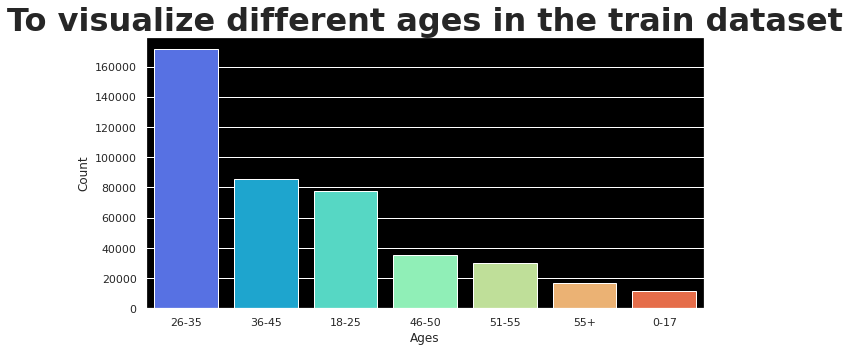

In [63]:
#To visualize the age in the train dataset
age=train['Age'].value_counts()
#to visualize the ages using the seaborn
ax=plt.axes()
#set the background color
ax.set(facecolor='black')
#set sns figures size  and style
sns.set(rc={'figure.figsize':(18,6)},style='whitegrid')
#set the title of the of the figures
ax.set_title("To visualize different ages in the train dataset",fontsize=32,fontweight='bold')
#Le's visualize the barplot using the seaborn
sns.barplot(y=age.values,x=age.index,palette='rainbow',color=['yellow','green','orange','blue','red','marron','pink'])
#On the x-axis 
plt.xlabel('Ages')
#on the y-axis
plt.ylabel('Count')
#And finally visualize it
plt.show()

# Observations:
### 1.From the above 26-35 ages people most purches the online items 
### 2.0-17 ages people do less purches

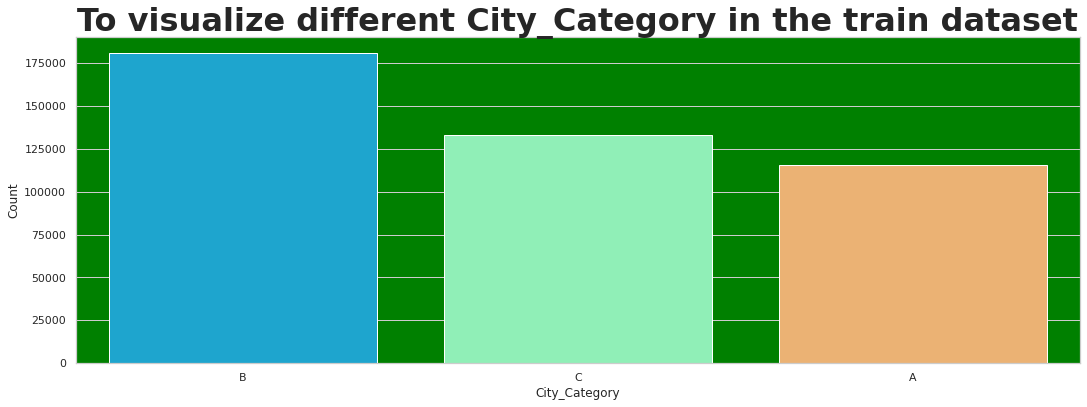

In [64]:
City_Category=train['City_Category'].value_counts()
#to visualize the ages using the seaborn
ax=plt.axes()
#set the background color
ax.set(facecolor='green')
#set sns figures size  and style
sns.set(rc={'figure.figsize':(8,6)},style='whitegrid')
#set the title of the of the figures
ax.set_title("To visualize different City_Category in the train dataset",fontsize=32,fontweight='bold')
#Le's visualize the barplot using the seaborn
sns.barplot(y=City_Category.values,x=City_Category.index,palette='rainbow')
#On the x-axis 
plt.xlabel('City_Category')
#on the y-axis
plt.ylabel('Count')
#And finally visualize it
plt.show()

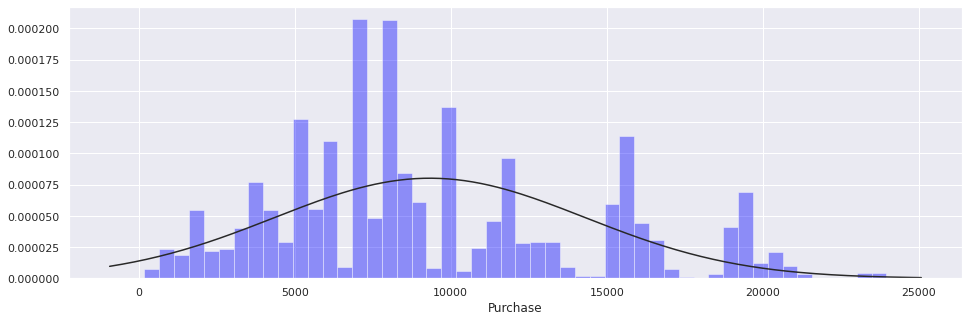

In [65]:
#import the norm from scipy
from scipy.stats import norm
#Visualize the distplot
sns.set(rc={'figure.figsize':(16,5)})
sns.distplot(train['Purchase'],fit=norm,kde=False,color='blue')

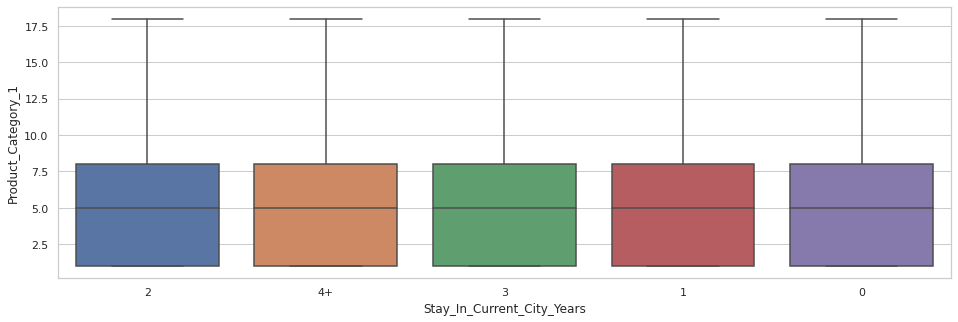

In [66]:
# Draw a vertical boxplot grouped 
# by a categorical variable:
sns.set_style("whitegrid")
sns.boxplot(y = 'Product_Category_1', x = 'Stay_In_Current_City_Years', data = train)

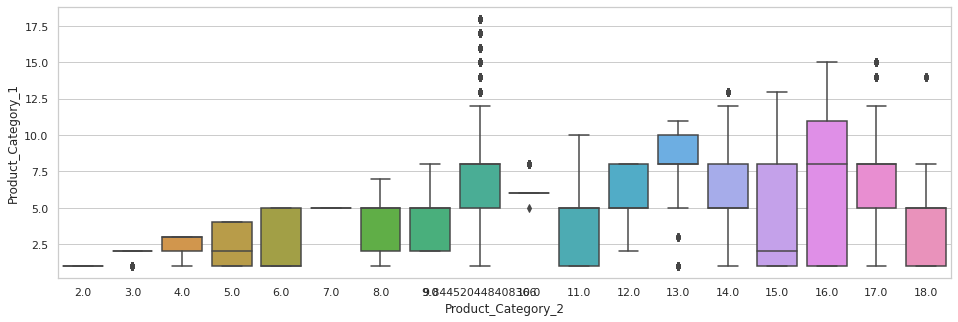

In [67]:
# Draw a vertical boxplot grouped 
# by a categorical variable:
sns.set_style("whitegrid")
sns.boxplot(y = 'Product_Category_1', x = 'Product_Category_2', data = train)

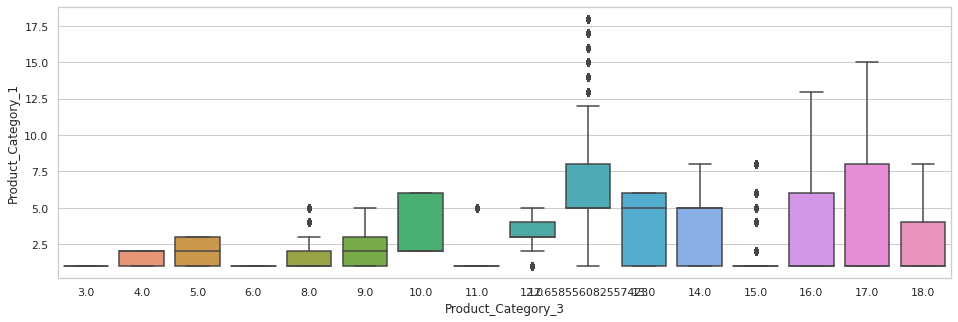

In [68]:
# Draw a vertical boxplot grouped 
# by a categorical variable:
sns.set_style("whitegrid")
sns.boxplot(y = 'Product_Category_1', x = 'Product_Category_3', data = train)

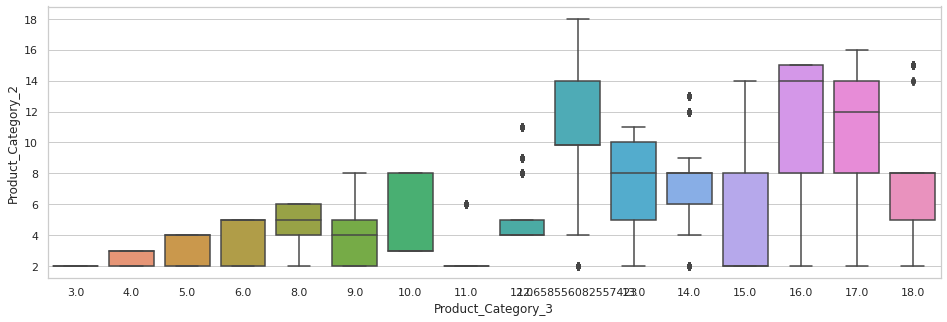

In [69]:
# Draw a vertical boxplot grouped 
# by a categorical variable:
sns.set_style("whitegrid")
sns.boxplot(y = 'Product_Category_2', x = 'Product_Category_3', data = train)

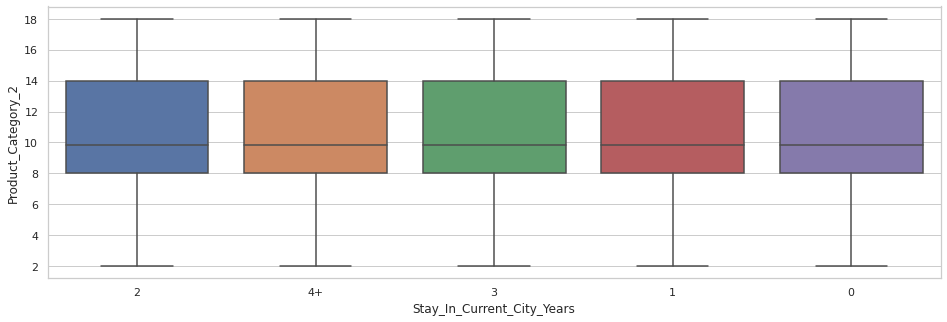

In [70]:
# Draw a vertical boxplot grouped 
# by a categorical variable:
sns.set_style("whitegrid")
sns.boxplot(y = 'Product_Category_2', x = 'Stay_In_Current_City_Years', data = train)

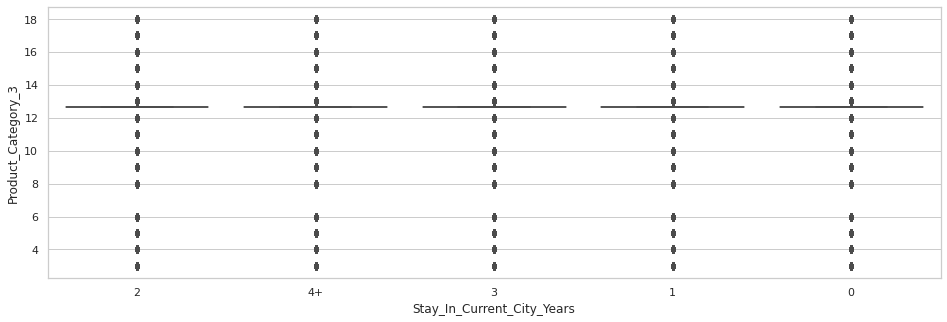

In [71]:
# Draw a vertical boxplot grouped 
# by a categorical variable:
sns.set_style("whitegrid")
sns.boxplot(y = 'Product_Category_3', x = 'Stay_In_Current_City_Years', data = train)

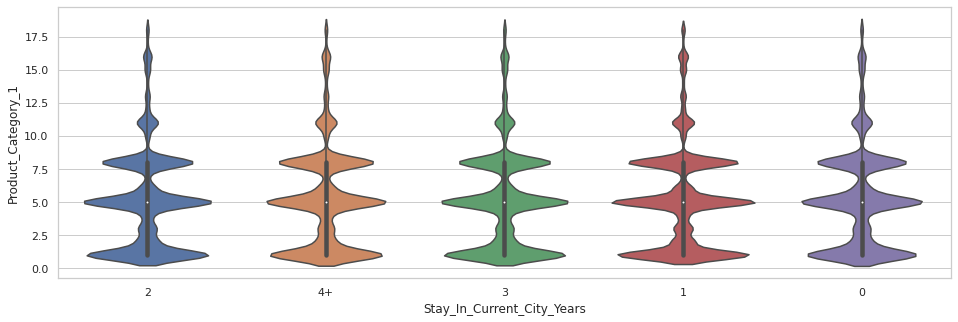

In [72]:
# Draw a vertical boxplot grouped 
# by a categorical variable:
sns.set_style("whitegrid")
sns.violinplot(y = 'Product_Category_1', x = 'Stay_In_Current_City_Years', data = train)

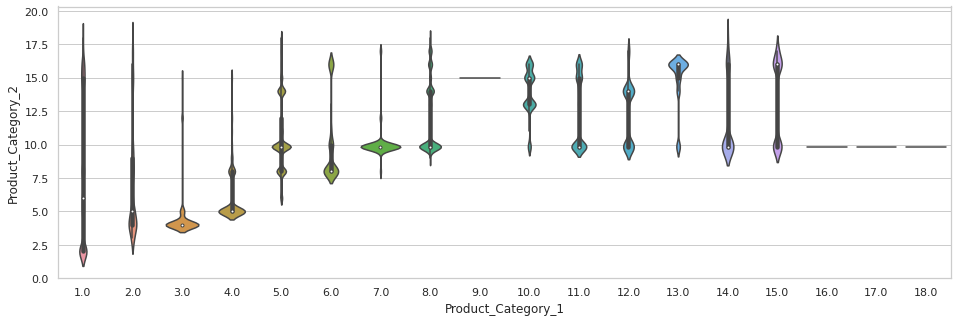

In [73]:
# Draw a vertical boxplot grouped 
# by a categorical variable:
sns.set_style("whitegrid")
sns.violinplot(x = 'Product_Category_1', y = 'Product_Category_2', data = train)

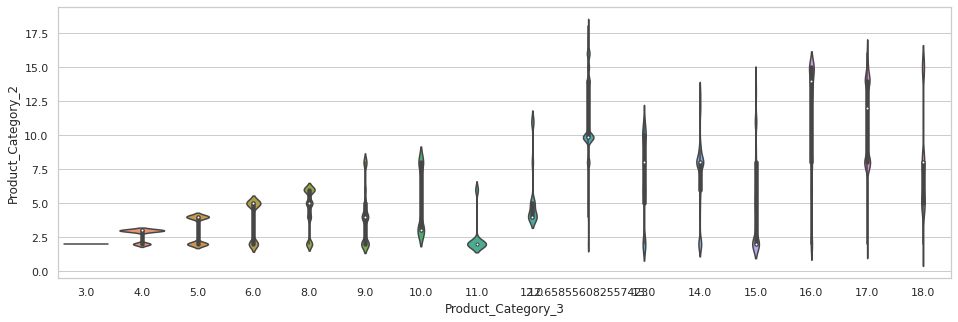

In [74]:
# Draw a vertical boxplot grouped 
# by a categorical variable:
sns.set_style("whitegrid")
sns.violinplot(x = 'Product_Category_3', y = 'Product_Category_2', data = train)

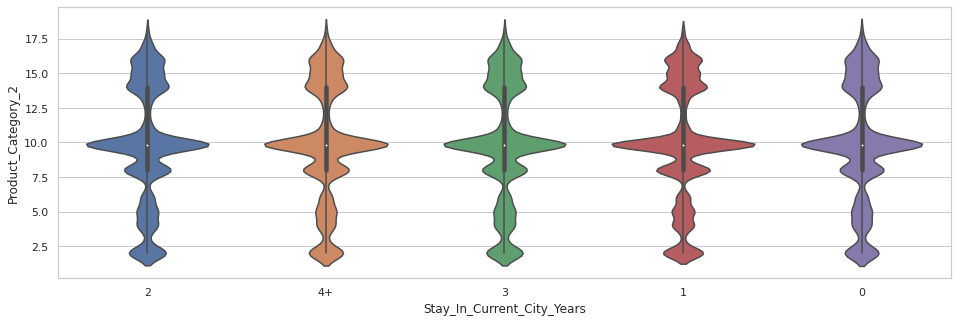

In [75]:
# Draw a vertical boxplot grouped 
# by a categorical variable:
sns.set_style("whitegrid")
sns.violinplot(y = 'Product_Category_2', x = 'Stay_In_Current_City_Years', data = train)

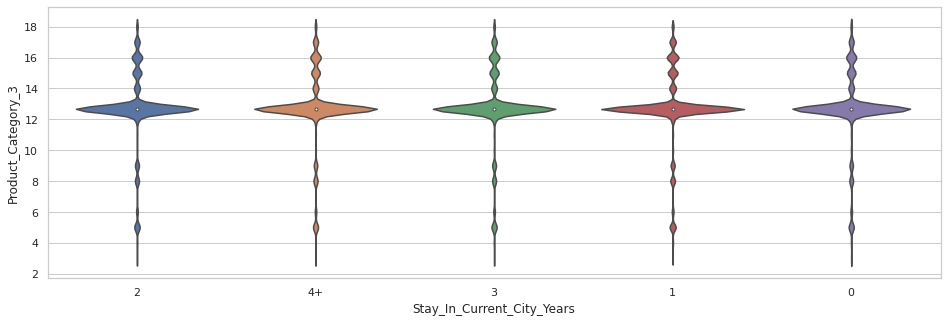

In [76]:
# Draw a vertical boxplot grouped 
# by a categorical variable:
sns.set_style("whitegrid")
sns.violinplot(y = 'Product_Category_3', x = 'Stay_In_Current_City_Years', data = train)

In [77]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 429156 entries, 0 to 429155
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     429156 non-null  int64  
 1   Product_ID                  429156 non-null  object 
 2   Gender                      429155 non-null  object 
 3   Age                         429155 non-null  object 
 4   Occupation                  429155 non-null  float64
 5   City_Category               429155 non-null  object 
 6   Stay_In_Current_City_Years  429155 non-null  object 
 7   Marital_Status              429155 non-null  float64
 8   Product_Category_1          429155 non-null  float64
 9   Product_Category_2          429156 non-null  float64
 10  Product_Category_3          429156 non-null  float64
 11  Purchase                    429155 non-null  float64
dtypes: float64(6), int64(1), object(5)
memory usage: 39.3+ MB


In [78]:
#Covert the categorical data to numerical 
label=LabelEncoder()
train['Product_ID']=label.fit_transform(train['Product_ID'])
train['Gender']=label.fit_transform(train['Gender'])
train['Age']=label.fit_transform(train['Age'])
train['City_Category']=label.fit_transform(train['City_Category'])
train['Stay_In_Current_City_Years']=label.fit_transform(train['Stay_In_Current_City_Years'])

In [79]:
#Divided the data into to varibales such as x and y
X=train.drop(['Purchase','User_ID'],axis=1)[:233599]
y=train['Purchase'][:233599]

In [80]:
def scale_data(df,col):
    scaler = StandardScaler()
  

    df[col] = scaler.fit_transform(df[col])
  
    return df

In [81]:
# passing data and column name for scaling
col_X = ['Occupation', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3']
X =  scale_data(X,col_X)
X=train.drop(['Purchase','User_ID','Product_ID'],axis=1)
#Print the X data
X=X[:233599]
X.head()

,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,0,0,10.0,0,2,0.0,3.0,9.84452,12.658556
1,0,0,10.0,0,2,0.0,1.0,6.00000,14.000000
2,0,0,10.0,0,2,0.0,12.0,9.84452,12.658556
3,0,0,10.0,0,2,0.0,12.0,14.00000,12.658556
4,1,6,16.0,2,4,0.0,8.0,9.84452,12.658556


In [82]:
#divided the x and y variables to train and test dataset
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20,random_state=120)

In [83]:
X.isna().sum()

Gender                        0
Age                           0
Occupation                    0
City_Category                 0
Stay_In_Current_City_Years    0
Marital_Status                0
Product_Category_1            0
Product_Category_2            0
Product_Category_3            0
dtype: int64

In [84]:
#install the LinearRegression model
linear=LinearRegression(fit_intercept=True,normalize=False)
#Let's fit the train and to the model
linear.fit(X_train,y_train)
#Prediction of the test dataset
linear_pred=linear.predict(X_test)

In [85]:
#Check the test score and train score to the LinearRegression algorithm
print(f'The Test_accuracy: {linear.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {linear.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 10.78
The Train_accuracy: 11.14


# Mean_squared_error and r2_score to the linearRegression model

In [86]:
#Linear regression mean_squared_error and r2_score
mse=mean_squared_error(y_test,linear_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error LinearRegression {:.4f}".format(rmse))
print("R2_score LinearRegression {:4f}".format(r2_score(y_test,linear_pred)))
print("mean_absolute_error LinearRegression {:4f}".format(mean_absolute_error(y_test,linear_pred)))

Root_mean_squred_error LinearRegression 4689.4985
R2_score LinearRegression 0.107844
mean_absolute_error LinearRegression 3604.777040


# DecisionTreeRegressor

In [87]:
#Install the decisiontreeregressor from sklearn
from sklearn.tree import DecisionTreeRegressor
#install the model
tree=DecisionTreeRegressor(criterion='friedman_mse',max_depth=10,random_state=120,max_features='log2',ccp_alpha=0.5)
#and fit the train data to the model
tree.fit(X_train,y_train)
#Prediction of the test dataset
tree_pred=tree.predict(X_test)

In [88]:
#Check the test score and train score to the LinearRegression algorithm
print(f'The Test_accuracy: {tree.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {tree.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 44.29
The Train_accuracy: 45.33


In [89]:
#DecisionTreeRegressor mean_squared_error , r2_score
mse=mean_squared_error(y_test,tree_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error DecisionTreeRegressor {:.4f}".format(rmse))
print("R2_score DecisionTreeRegressor {:4f}".format(r2_score(y_test,tree_pred)))
print("mean_absolute_error DecisionTreeRegressor {:4f}".format(mean_absolute_error(y_test,tree_pred)))

Root_mean_squred_error DecisionTreeRegressor 3705.5655
R2_score DecisionTreeRegressor 0.442946
mean_absolute_error DecisionTreeRegressor 2742.454989


# RandomForestRegressor

In [90]:
#Install the RandomForestRegressor model to the sklearn
from sklearn.ensemble import RandomForestRegressor
#install the RandomForestRegressor
random=RandomForestRegressor( n_estimators=200,criterion='friedman_mse',
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=5,
    max_features='auto',random_state=40,
    ccp_alpha=0.1)
#Let's fit the train data to the model
random.fit(X_train,y_train)
#Prediction to the test dataset
random_pred=random.predict(X_test)

In [91]:
#Check the test score and train score to the LinearRegression algorithm
print(f'The Test_accuracy: {random.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {random.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 64.72
The Train_accuracy: 69.44


In [92]:
#RandomForestRegressor algorithms mean_squared_error and r2_score
mse=mean_squared_error(y_test,random_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error RandomForestRegressor {:.4f}".format(rmse))
print("R2_score RandomForestRegressor {:4f}".format(r2_score(y_test,random_pred)))
print("mean_absolute_error RandomForestRegressor {:4f}".format(mean_absolute_error(y_test,random_pred)))

Root_mean_squred_error RandomForestRegressor 2949.0225
R2_score RandomForestRegressor 0.647187
mean_absolute_error RandomForestRegressor 2217.032735


# XGBRegressor

In [93]:
#Install the XGBRegressor from the xgboost
from xgboost import XGBRegressor
#Install the XGBRegressor
xgb=XGBRegressor()
#And fit the train data to the model
xgb.fit(X_train,y_train)
#Prediction of the XGBRegressor
xgb_pred=xgb.predict(X_test)

[12:30:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [94]:
#Check the test score and train score to the LinearRegression algorithm
print(f'The Test_accuracy: {xgb.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {xgb.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 63.16
The Train_accuracy: 64.22


In [95]:
#XGBRegressor algorithms mean_squared_error and r2_score
mse=mean_squared_error(y_test,xgb_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error XGBRegressor {:.4f}".format(rmse))
print("R2_score XGBRegressor {:4f}".format(r2_score(y_test,xgb_pred)))
print("mean_absolute_error XGBRegressor {:4f}".format(mean_absolute_error(y_test,xgb_pred)))

Root_mean_squred_error XGBRegressor 3013.5048
R2_score XGBRegressor 0.631590
mean_absolute_error XGBRegressor 2292.690862


# GradientBoostingRegressor

In [96]:
# Fit a Gradient Boosting Regressor model to the train dataset

# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate the model
gbr=GradientBoostingRegressor(n_estimators=500, learning_rate=0.1, max_depth=8, random_state=42
                                ,loss='ls', min_samples_split=5)
# Fit the model to the data
gbr.fit(X_train,y_train)
#Prediction of the test data
gbr_pred=gbr.predict(X_test)

In [97]:
#Check the test score and train score to the GradientBoostingRegressor algorithm
print(f'The Test_accuracy: {gbr.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {gbr.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 65.55
The Train_accuracy: 73.11


In [98]:
#GradientBoostingRegressor algorithms mean_squared_error and r2_score
mse=mean_squared_error(y_test,gbr_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error GradientBoostingRegressor {:.4f}".format(rmse))
print("R2_score GradientBoostingRegressor {:4f}".format(r2_score(y_test,gbr_pred)))
print("mean_absolute_error GradientBoostingRegressor {:4f}".format(mean_absolute_error(y_test,gbr_pred)))

Root_mean_squred_error GradientBoostingRegressor 2914.1953
R2_score GradientBoostingRegressor 0.655471
mean_absolute_error GradientBoostingRegressor 2170.557283


# AdaBoostRegressor

In [99]:
# Fit a Decision Tree Regressor model to the train dataset
# Import AdaBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
# Instantiate the model
adam=AdaBoostRegressor(base_estimator=RandomForestRegressor( n_estimators=200,criterion='friedman_mse',
    max_depth=15,
    min_samples_split=2,
    min_samples_leaf=5,
    max_features='auto',random_state=40,
    ccp_alpha=0.1),learning_rate =1.0, n_estimators= 1300, random_state= 120,loss='linear')
# Fit the model to the data
adam.fit(X_train,y_train)
#Prediction
adam_pred=adam.predict(X_test)

In [100]:
#Check the test score and train score to the AdaBoostRegressor algorithm
print(f'The Test_accuracy: {adam.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {adam.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 63.72
The Train_accuracy: 70.50


In [101]:
#GradientBoostingRegressor algorithms mean_squared_error and r2_score
mse=mean_squared_error(y_test,adam_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error AdaBoostRegressor {:.4f}".format(rmse))
print("R2_score AdaBoostRegressor {:4f}".format(r2_score(y_test,adam_pred)))
print("mean_absolute_error AdaBoostRegressor {:4f}".format(mean_absolute_error(y_test,adam_pred)))

Root_mean_squred_error AdaBoostRegressor 2990.5239
R2_score AdaBoostRegressor 0.637187
mean_absolute_error AdaBoostRegressor 2274.448792


# LGBMRegressor

In [102]:
# Fit a Decision Tree Regressor model to the train dataset

# Import LGBMRegressor
from lightgbm import LGBMRegressor
# Instantiate the model
lgb=LGBMRegressor(max_bin=200,learning_rate=0.08,num_iterations=350)
# Fit the model to the data
lgb.fit(X_train,y_train)
#Predition
lgb_pred=lgb.predict(X_test)

In [103]:
#Check the test score and train score to the LGBMRegressor algorithm
print(f'The Test_accuracy: {lgb.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {lgb.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 65.60
The Train_accuracy: 67.46


In [104]:
#LGBMRegressor algorithms mean_squared_error and r2_score
mse=mean_squared_error(y_test,lgb_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error LGBMRegressor {:.4f}".format(rmse))
print("R2_score LGBMRegressor {:4f}".format(r2_score(y_test,lgb_pred)))
print("mean_absolute_error LGBMRegressor {:4f}".format(mean_absolute_error(y_test,lgb_pred)))

Root_mean_squred_error LGBMRegressor 2911.8296
R2_score LGBMRegressor 0.656030
mean_absolute_error LGBMRegressor 2194.441285


In [105]:
#install the model KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
knn=KNeighborsRegressor()
#fit the train data to the model
knn.fit(X_train,y_train)
#Prediction
knn_pred=knn.predict(X_test)

In [106]:
#Check the test score and train score to the KNeighborsRegressor algorithm
print(f'The Test_accuracy: {knn.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {knn.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 55.07
The Train_accuracy: 68.67


In [107]:
#KNeighborsRegressor algorithms mean_squared_error and r2_score
mse=mean_squared_error(y_test,knn_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error KNeighborsRegressor {:.4f}".format(rmse))
print("R2_score KNeighborsRegressor {:4f}".format(r2_score(y_test,knn_pred)))
print("mean_absolute_error KNeighborsRegressor {:4f}".format(mean_absolute_error(y_test,knn_pred)))

Root_mean_squred_error KNeighborsRegressor 3327.8391
R2_score KNeighborsRegressor 0.550724
mean_absolute_error KNeighborsRegressor 2440.154452


In [108]:
#install the model GaussianProcessRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
gauss=KNeighborsRegressor()
#fit the train data to the model
gauss.fit(X_train,y_train)
#Prediction
gauss_pred=gauss.predict(X_test)

In [109]:
#Check the test score and train score to the GaussianProcessRegressor algorithm
print(f'The Test_accuracy: {gauss.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {gauss.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 55.07
The Train_accuracy: 68.67


In [110]:
#KNeighborsRegressor algorithms mean_squared_error and r2_score
mse=mean_squared_error(y_test,gauss_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error GaussianProcessRegressor {:.4f}".format(rmse))
print("R2_score GaussianProcessRegressor {:4f}".format(r2_score(y_test,gauss_pred)))
print("mean_absolute_error GaussianProcessRegressor {:4f}".format(mean_absolute_error(y_test,gauss_pred)))

Root_mean_squred_error GaussianProcessRegressor 3327.8391
R2_score GaussianProcessRegressor 0.550724
mean_absolute_error GaussianProcessRegressor 2440.154452


In [130]:
# Helper function to perform hyper parameter tunning with RandomizedSearchCV
def random_search(model,train_x,train_y,param_grid):
    from sklearn.model_selection import RandomizedSearchCV
    
 # Random search of parameters, using 3 fold cross validation, 
  # search across 100 different combinations, and use all available cores
    random=RandomizedSearchCV(estimator=model,param_distributions=param_grid,n_iter=15,cv=2,verbose=1,random_state=120,n_jobs=-1)
    random.fit(X_train[:233599],y_train[:233599])
  # print best parameters    
    print(random.best_params_)

In [131]:
# create RandomForest parameters dict for tunning
rf_para_grid={'n_estimators':[1,2,4,8,16,32,64,100,200],
             'max_features':['auto','sqrt'],
             'max_depth':np.linspace(1,32,32, endpoint=True),
             'min_samples_leaf':np.linspace(0.1,0.5,5,endpoint=True),
             'bootstrap':[True,False]}
# passing data for hyper parameter tunning with Randomized search cv
random_search(RandomForestRegressor(),X_train,y_train,param_grid=rf_para_grid)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
{'n_estimators': 16, 'min_samples_leaf': 0.2, 'max_features': 'auto', 'max_depth': 7.0, 'bootstrap': False}


In [132]:
#install the RandomForestRegressor
random1=RandomForestRegressor(**{'n_estimators': 16, 'min_samples_leaf': 0.2, 'max_features': 'auto', 'max_depth': 7.0, 'bootstrap': False})
#Let's fit the train data to the model
random1.fit(X_train,y_train)
#Prediction to the test dataset
random1_pred=random1.predict(X_test)

In [133]:
#Check the test score and train score to the RandomForestRegressor algorithm
print(f'The Test_accuracy: {random1.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {random1.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 30.58
The Train_accuracy: 30.81


In [134]:
#KNeighborsRegressor algorithms mean_squared_error and r2_score
mse=mean_squared_error(y_test,random1_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error RandomForestRegressor {:.4f}".format(rmse))
print("R2_score RandomForestRegressor {:4f}".format(r2_score(y_test,random1_pred)))
print("mean_absolute_error RandomForestRegressor {:4f}".format(mean_absolute_error(y_test,random1_pred)))

Root_mean_squred_error RandomForestRegressor 4136.5757
R2_score RandomForestRegressor 0.305823
mean_absolute_error RandomForestRegressor 3134.868964


In [135]:
# create DecisionTreeRegressor parameters dict for tunning
dtr_para_grid={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           "min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           "max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
# passing data for hyper parameter tunning with Randomized search cv
random_search(DecisionTreeRegressor(),X_train,y_train,param_grid=dtr_para_grid)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
{'splitter': 'best', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 6, 'max_leaf_nodes': 70, 'max_features': None, 'max_depth': 11}


In [136]:
#install the model
tree1=DecisionTreeRegressor(**{'splitter': 'best', 'min_weight_fraction_leaf': 0.2, 'min_samples_leaf': 6, 'max_leaf_nodes': 70, 'max_features': None, 'max_depth': 11})
#and fit the train data to the model
tree1.fit(X_train,y_train)
#Prediction of the test dataset
tree1_pred=tree.predict(X_test)

In [137]:
#Check the test score and train score to the DecisionTreeRegressor algorithm
print(f'The Test_accuracy: {tree1.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {tree1.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 30.58
The Train_accuracy: 30.81


In [138]:
#DecisionTreeRegressor algorithms mean_squared_error and r2_score
mse=mean_squared_error(y_test,tree1_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error DecisionTreeRegressor {:.4f}".format(rmse))
print("R2_score DecisionTreeRegressor {:4f}".format(r2_score(y_test,tree1_pred)))
print("mean_absolute_error DecisionTreeRegressor {:4f}".format(mean_absolute_error(y_test,tree1_pred)))

Root_mean_squred_error DecisionTreeRegressor 3705.5655
R2_score DecisionTreeRegressor 0.442946
mean_absolute_error DecisionTreeRegressor 2742.454989


In [139]:
# create XGBoostRegressor parameters dict for tunning
xgb_para_grid={
             'learning_rate':[0.05,0.10,0.15],
             'max_depth':range(3,10,2),
             'min_child_weight':range(1,6,2),
              'gamma':[0.0,0.1,0.02],
               'colsmple_bytree':[0.3,0.4]}

# passing data for hyper parameter tunning with Randomized search cv
random_search(XGBRegressor(),X_train,y_train,param_grid=xgb_para_grid)

Fitting 2 folds for each of 15 candidates, totalling 30 fits
[13:06:41] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
{'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.15, 'gamma': 0.1, 'colsmple_bytree': 0.4}


In [140]:
#Install the XGBRegressor
xgb1=XGBRegressor(**{'min_child_weight': 5, 'max_depth': 7, 'learning_rate': 0.15, 'gamma': 0.1, 'colsmple_bytree': 0.4})
#And fit the train data to the model
xgb1.fit(X_train,y_train)
#Prediction of the XGBRegressor
xgb1_pred=xgb.predict(X_test)

[13:07:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [141]:
#Check the test score and train score to the LinearRegression algorithm
print(f'The Test_accuracy: {xgb1.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {xgb1.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 65.62
The Train_accuracy: 67.91


In [142]:
#XGBRegressor algorithms mean_squared_error and r2_score
mse=mean_squared_error(y_test,xgb1_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error XGBRegressor {:.4f}".format(rmse))
print("R2_score XGBRegressor {:4f}".format(r2_score(y_test,xgb1_pred)))
print("mean_absolute_error XGBRegressor {:4f}".format(mean_absolute_error(y_test,xgb1_pred)))

Root_mean_squred_error XGBRegressor 3013.5048
R2_score XGBRegressor 0.631590
mean_absolute_error XGBRegressor 2292.690862


In [126]:
pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.1 MB/s 


In [143]:
# install the CatBoostRegressor from the sklearn
from catboost import CatBoostRegressor
#install the CatBoostRegressor
vote=CatBoostRegressor(iterations=200,
                             learning_rate=0.08,
                             depth=15,
                             eval_metric='RMSE',
                             random_seed = 42,
                             bagging_temperature = 0.2,
                             od_type='Iter',
                             metric_period = 50,
                             od_wait=20)
#Fit the train data to the model
vote.fit(X_train,y_train)
#Prediction
vote_pred=vote.predict(X_test)

0:	learn: 4728.1486230	total: 104ms	remaining: 20.7s
50:	learn: 2917.8638548	total: 5.03s	remaining: 14.7s
100:	learn: 2811.0204722	total: 10.1s	remaining: 9.93s
150:	learn: 2725.9580917	total: 15.4s	remaining: 5.01s
199:	learn: 2669.2056475	total: 20.4s	remaining: 0us


In [144]:
#Check the test score and train score to the VotingRegressor
print(f'The Test_accuracy: {vote.score(X_test,y_test)*100:.2f}')
#Train score for the data
print(f'The Train_accuracy: {vote.score(X_train,y_train)*100:.2f}')

The Test_accuracy: 65.79
The Train_accuracy: 71.21


In [145]:
#XGBRegressor algorithms mean_squared_error and r2_score
mse=mean_squared_error(y_test,vote_pred)
rmse=np.sqrt(mse)
print("Root_mean_squred_error VotingRegressor {:.4f}".format(rmse))
print("R2_score VotingRegressor {:4f}".format(r2_score(y_test,vote_pred)))
print("mean_absolute_error VotingRegressor {:4f}".format(mean_absolute_error(y_test,vote_pred)))

Root_mean_squred_error VotingRegressor 2903.6991
R2_score VotingRegressor 0.657949
mean_absolute_error VotingRegressor 2176.758168


In [149]:
user_id=test['User_ID']
test['Product_ID']=label.fit_transform(test['Product_ID'])
test['Gender']=label.fit_transform(test['Gender'])
test['Age']=label.fit_transform(test['Age'])
test['City_Category']=label.fit_transform(test['City_Category'])
test['Stay_In_Current_City_Years']=label.fit_transform(test['Stay_In_Current_City_Years'])

In [150]:
X_test=test.drop(['User_ID'],axis=1)

In [151]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  233599 non-null  int64  
 1   Gender                      233599 non-null  int64  
 2   Age                         233599 non-null  int64  
 3   Occupation                  233599 non-null  int64  
 4   City_Category               233599 non-null  int64  
 5   Stay_In_Current_City_Years  233599 non-null  int64  
 6   Marital_Status              233599 non-null  int64  
 7   Product_Category_1          233599 non-null  int64  
 8   Product_Category_2          233599 non-null  float64
 9   Product_Category_3          233599 non-null  float64
dtypes: float64(2), int64(8)
memory usage: 17.8 MB


In [152]:
prediction=vote.predict(X_test)
prediction

array([15471.34107333, 10643.17365561,  7127.09251714, ...,
       13727.85995901, 21423.95562856,  2762.88771873])

In [155]:
submission=pd.DataFrame({'User_ID':user_id,'Purches':prediction})
submission.to_csv('Balck_firday_prediction.csv',index=False)